In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
FL = pd.read_csv('FLcounties.csv')

In [3]:
FL = FL.drop(columns = ['2012 map'])

In [4]:
FL['H_claims/sq_mi'] = FL['Hermine claims']/FL['sq_mi']
FL['M_claims/sq_mi'] = FL['Matthew claims']/FL['sq_mi']
FL['T_claims/sq_mi'] = FL['Total claims']/FL['sq_mi']

In [7]:
FL.loc[0:5,:]

,County,sq_mi,Hermine claims,Matthew claims,Total claims,2010 Population,Pop per sq mi,Coastline Approx. Mi,H_claims/sq_mi,M_claims/sq_mi,T_claims/sq_mi
0,Nassau,1557.0,147.0,15967.0,16114.0,78435.0,50.375723,25.0,0.094412,10.254978,10.349390
1,Duval,918.0,993.0,19090.0,20083.0,912043.0,993.510893,17.5,1.081699,20.795207,21.876906
2,St. Johns,726.0,73.0,1881.0,1954.0,226578.0,312.090909,40.0,0.100551,2.590909,2.691460
3,Brevard,822.0,145.0,10802.0,10947.0,568183.0,691.220195,72.0,0.176399,13.141119,13.317518
4,Volusia,1432.0,124.0,34403.0,34527.0,518660.0,362.192737,45.0,0.086592,24.024441,24.111034
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
corrmat = FL.corr()
print(corrmat)

                         sq_mi  Hermine claims  Matthew claims  Total claims  \
sq_mi                 1.000000       -0.214966        0.679565      0.668798   
Hermine claims       -0.214966        1.000000        0.156395      0.187951   
Matthew claims        0.679565        0.156395        1.000000      0.999487   
Total claims          0.668798        0.187951        0.999487      1.000000   
2010 Population      -0.368234        0.785758        0.336506      0.360109   
Pop per sq mi        -0.588646        0.783727        0.040055      0.065248   
Coastline Approx. Mi -0.314231       -0.580742       -0.141640     -0.159683   
H_claims/sq_mi       -0.302019        0.995912        0.093131      0.124908   
M_claims/sq_mi        0.379961        0.468207        0.906822      0.916942   
T_claims/sq_mi        0.356508        0.507326        0.891316      0.902790   

                      2010 Population  Pop per sq mi  Coastline Approx. Mi  \
sq_mi                       -0.368234    

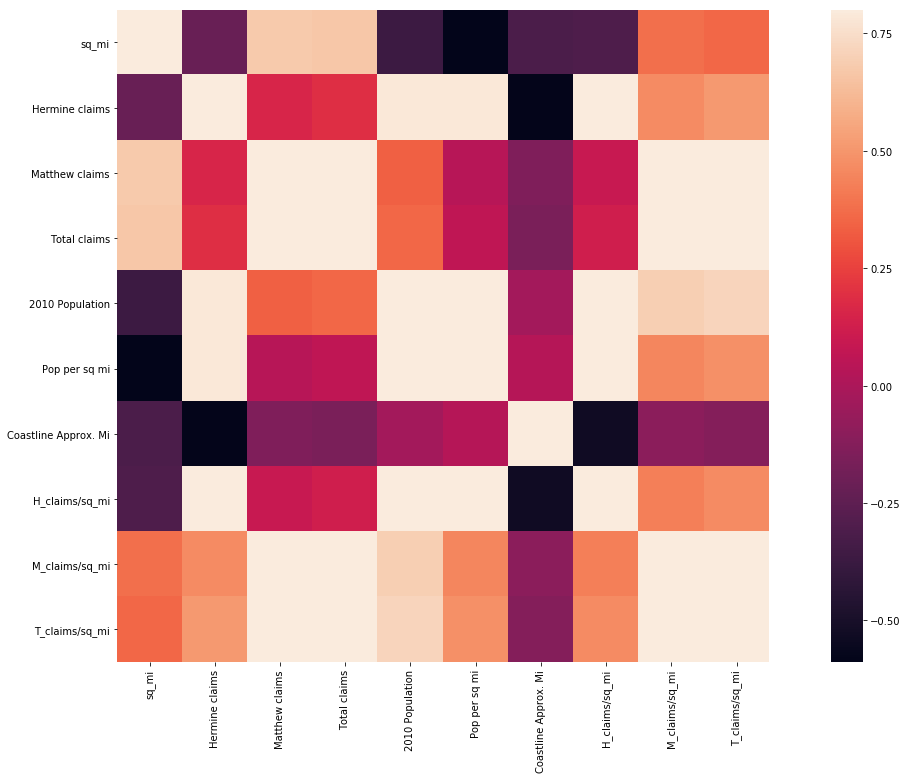

In [13]:
dims = (22, 12)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Total property insurance claims per square mile of the Florida counties has a strongly positive correlation with 2010 Population while Hermine claims per square mile also has a strongly positive correlation with population density.
Total claims per square mile has a slight negative correlation with length of coastline and a slight positive correlation with total square miles, suggesting that inland homes may make more flood unrelated insurance claims.
Hermine claims per square mile has a strongly negative correlation with Coastline in miles, in agreement with total claims per square mile.

Inland property insurance claims are usually related to trees falling on homes and cars, and leaky roofs.
Aerial photos would lend insight into the number of trees, the number of roofs, and perhaps the strength of the wind, as mountains and hills lend some protection against coastal gales.

In [23]:

FLhi = FL[FL['County'].isin(['Duval','Volusia'])]
FLlo = FL[FL['County'].isin(['Brevard','Nassau'])]
FLlowest = FL[FL['County'].isin(['St. Johns'])]

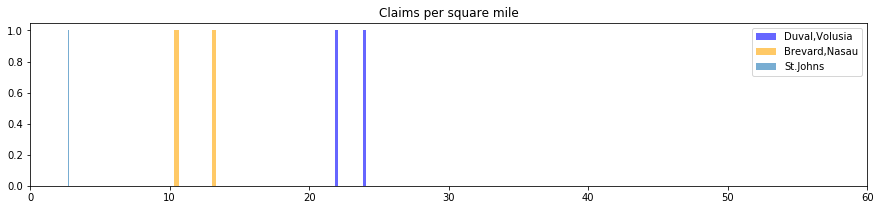

In [24]:
a4_dims =(15, 3)
fig, ax = plt.subplots(figsize=a4_dims)
plt.hist(x=FLhi['T_claims/sq_mi'], label = 'Duval,Volusia', alpha = .6, color = 'blue')
plt.hist(x=FLlo['T_claims/sq_mi'], label = 'Brevard,Nasau', alpha = .6, color = 'orange')
plt.hist(x=FLlowest['T_claims/sq_mi'], label = 'St.Johns', alpha = .6)

plt.title('Claims per square mile')
plt.xlim(0,60)
plt.legend(loc='upper right')
plt.show()